# Capstone Project - THE BATTLE OF NEIGHBORHOODS

## Description of the problem and  background

This report aims to analyze the city of Madrid and establish, based on different criteria, the best place to install a dental clinic.

Madrid is the capital of Spain, so it is an pretty big city and has a very abundant population, being one of the most important capitals of Europe.


It is also a city that has a great tourist attraction, so many areas of the capital are occupied by businesses dedicated to attract tourists.

In this sense, it should be noted that, when looking for a suitable location for a dental clinic, it is necessary to look for an area with a high number of fixed inhabitants, that do not vary over time and that can be established as fixed business customers, so it is necessary to avoid the most tourist areas and look for residential areas but with a high economic activity.

Therefore, the aspects to study when evaluating an adequate location for a dental clinic would be:

    - Number of inhabitants

    - Per capita income of the inhabitants

    - Existing businesses in the surroundings

    - Adequate communication with the rest of the city

    -Touristic attractions nearby

# Description of the data 

To solve the problem the following data is needed:
    
    - Districts Madrid data(code, name, coordinates, area, habitants...): This information has been obtained form different websites, and has been stored as shp and csv files.
    
    - Diferent bussines in the neighbourhood: thanks to Foursquare API, we can obtain information about the venues in each neighborhood
    
    
    
    

# Approach

    - Collect the districts of Madrid info

    - Use FoursquareApi to find all venues in the different districts
    
    - Finally, considering the venues, the communications and the number of inhabitants choose the best localization for the dental clinic

# LIBRARIES REQUIRED

In [57]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

# conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import geopandas as gpd

print('Libraries imported.')

Libraries imported.


# DATA COLLECTION

In [142]:
dtypes = {'Codigo': 'str', 'Nombre': 'str', 'Latitude':'float', 'Longitude':'float', 'Superficie (ha)':'float', 'Poblacion':'int', 'Densidad(hab/ha)':'float'}

In [143]:
dfDistritos=pd.read_csv('Distritos.csv', sep=';', decimal=',',  encoding='latin-1', dtype=dtypes)

In [144]:
dfDistritos.columns = map(str.upper, dfDistritos.columns)

In [145]:
dfDistritos.rename(columns={'CODIGO':'CODDISTRIT'}, inplace=True)


In [146]:
dfDistritos.columns

Index(['CODDISTRIT', 'NOMBRE', 'LATITUDE', 'LONGITUDE', 'SUPERFICIE (HA)',
       'POBLACIÓN', 'DENSIDAD(HAB/HA)'],
      dtype='object')

In [147]:
dfDistritos.loc[0,:]

CODDISTRIT                1
NOMBRE               Centro
LATITUDE            40.4183
LONGITUDE          -3.70275
SUPERFICIE (HA)      522.82
POBLACIÓN            131928
DENSIDAD(HAB/HA)     252.34
Name: 0, dtype: object

In [148]:
address = 'Madrid, Spain'

geolocator = Nominatim(user_agent="T_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Madrid are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Madrid are 40.4167047, -3.7035825.


In [182]:
map_Madrid = folium.Map(location=[latitude, longitude], zoom_start=10)

map_Madrid.choropleth(
    geo_data='Distritos.geojson',
    name='choropleth',
    data=dfDistritos,
    columns=['CODDISTRIT', 'DENSIDAD(HAB/HA)'],
    key_on = 'feature.properties.CODDISTRIT',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='DENSIDAD (HAB/HA)'
)



map_Madrid.choropleth(open('ParadasMetro.geojson',  encoding="utf8").read())



folium.LayerControl().add_to(map_Madrid)
map_Madrid





In [202]:
border_fp = "DISTRITOS_b.shp"
grid_fp = "shpParadasMetro.shp"

# Read files
grid = gpd.read_file(grid_fp)
hel = gpd.read_file(border_fp)

In [215]:
grid

,OBJECTID,DENOMINACI,geometry
0,1,NOVICIADO,POINT (-3.707419042613622 40.42484223450989)
1,2,ESTRELLA,POINT (-3.661785270760629 40.4114722201379)
2,3,RIOS ROSAS,POINT (-3.701328481177286 40.44197535728741)
3,4,CAMPAMENTO,POINT (-3.768128136787401 40.3948077583334)
4,5,USERA,POINT (-3.706895642789314 40.38709669420096)
5,6,O'DONNELL,POINT (-3.668595146291945 40.42288842557608)
6,7,PUERTA DEL ANGEL,POINT (-3.727240451815418 40.41389889532768)
7,8,EL BERCIAL,POINT (-3.729633180489329 40.32907236841386)
8,9,HOSPITAL 12 DE OCTUBRE,POINT (-3.69585469244455 40.37503136222223)
9,10,ALMENDRALES,POINT (-3.697881397655209 40.38409352810521)


In [212]:
hel

,NOMBRE,CODDISTRIT,SHAPE_area,SHAPE_len,geometry
0,Centro,1,5.231267e+06,10304.545144,POLYGON ((-3.693162104185235 40.40734504903418...
1,Arganzuela,2,6.466406e+06,12834.885747,POLYGON ((-3.703886381691941 40.40519727197204...
2,Retiro,3,5.465317e+06,9523.926778,POLYGON ((-3.664094899859119 40.40852302209894...
3,Salamanca,4,5.387252e+06,10862.998823,"POLYGON ((-3.659399439733747 40.4382729112837,..."
4,ChamartÃ­n,5,9.170135e+06,13401.482255,POLYGON ((-3.673616238415053 40.48270473173112...
5,TetuÃ¡n,6,5.388122e+06,9925.073151,POLYGON ((-3.697636470239124 40.47453852915348...
6,ChamberÃ­,7,4.674107e+06,9020.565056,POLYGON ((-3.691222349392855 40.44619027871002...
7,Fuencarral - El Pardo,8,2.378101e+08,94525.156286,POLYGON ((-3.652821565811921 40.64274388008095...
8,Moncloa - Aravaca,9,4.653110e+07,41015.598541,POLYGON ((-3.801039615425398 40.46944797637842...
9,Latina,10,2.541722e+07,28169.066266,POLYGON ((-3.722611636148907 40.41137875357483...


In [203]:
grid=grid[['OBJECTID', 'DENOMINACI','geometry']]

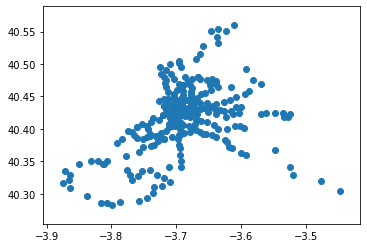

In [213]:
grid.plot()


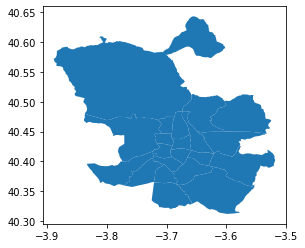

In [205]:
basemap = hel.plot()
basemap

In [214]:
def point_inside_shape(point, shape):
    #point of type Point
    #shape of type Polygon
    pnt = geopandas.GeoDataFrame(geometry=[point], index=['A'])
    return(pnt.within(shape).iloc[0])

for p in [p1, p2, p3]:
    print(point_inside_shape(p, g))

TypeError: overlay only takes GeoDataFrames with (multi)polygon  geometries.

In [195]:
result

,IDESTACION,HOJA25000,SECCIONCEN,DENOMINA_2,CORREDOR,PARTICULA,CODIGOESTA,CALIFICADO,INTERURB_1,OBJECTID,FECHAALTA,TIPO,DISTRITO,CORONA123,SECTOR,NOMBRE,ZONATRANSP,MODO,SHAPE_area,OBSERVACIO,CODIGOCTME,CODIGOMUNI,CARRETERA,Y,X,geometry,CODIGOPROV,INTERURBAN,FECHAFIN,TESELA,NUMEROPORT,MODOINTERC,CODIGONUCL,ACONDICION,ACONDICI_1,DENOMINA_1,GRADOACCES,SECTORURBA,SITUACIONC,CODDISTRIT,CODIGOEMPR,TIPONUMERO,SITUACION,CODIGOINTE,CODIGOVIA,CODIGOENTI,TIPOVIA,CORONATARI,SHAPE_len,DENOMINACI,ENCUESTAAF,FECHAACTUA,CODIGOPOST,FECHAINICI,NOMBREVIA,BARRIO,ENCUESTADO


In [13]:
#@hidden_cell
CLIENT_ID = 'CULRBXG4RB3KHY5XH4JWM4QF4SIDYOSWQRYSGL0B5ROAXDMF' # your Foursquare ID
CLIENT_SECRET = 'DFBRCEALXBMJ3AGGOA0XZHJKVY0SHW4Y3TQGXCH43BXRXKTB' # your Foursquare Secret
VERSION = '20190802' # Foursquare API version

In [14]:
neighborhood_latitude = dfDistritos.loc[0, 'LATITUDE'] # neighborhood latitude value
neighborhood_longitude = dfDistritos.loc[0, 'LONGITUDE'] # neighborhood longitude value
neighborhood_name = dfDistritos.loc[0, 'NOMBRE'] # neighborhood name

In [15]:
LIMIT = 30 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=CULRBXG4RB3KHY5XH4JWM4QF4SIDYOSWQRYSGL0B5ROAXDMF&client_secret=DFBRCEALXBMJ3AGGOA0XZHJKVY0SHW4Y3TQGXCH43BXRXKTB&v=20190802&ll=40.4183083,-3.70275&radius=500&limit=30'

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
LIMIT=100
Madrid_venues = getNearbyVenues(names=dfDistritos['NOMBRE'],
                                   latitudes=dfDistritos['LATITUDE'],
                                   longitudes=dfDistritos['LONGITUDE'])


Centro


ProxyError: HTTPSConnectionPool(host='api.foursquare.com', port=443): Max retries exceeded with url: /v2/venues/explore?&client_id=CULRBXG4RB3KHY5XH4JWM4QF4SIDYOSWQRYSGL0B5ROAXDMF&client_secret=DFBRCEALXBMJ3AGGOA0XZHJKVY0SHW4Y3TQGXCH43BXRXKTB&v=20190802&ll=40.4183083,-3.70275&radius=500&limit=100 (Caused by ProxyError('Cannot connect to proxy.', NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x00000203724C2390>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')))

In [19]:
Madrid_onehot = pd.get_dummies(Madrid_venues[['Venue Category']], prefix="", prefix_sep="")


NameError: name 'Madrid_venues' is not defined

In [ ]:
# add neighborhood column back to dataframe
Madrid_onehot['NOMBRE'] = Madrid_venues['NOMBRE'] 

In [ ]:
fixed_columns = [Madrid_onehot.columns[-1]] + list(Madrid_onehot.columns[:-1])
Madrid_onehot = Madrid_onehot[fixed_columns]


In [ ]:
Madrid_grouped= Madrid_onehot.groupby('NOMBRE').mean().reset_index()
Madrid_grouped

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['NOMBRE']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['NOMBRE'] = Madrid_grouped['NOMBRE']

for ind in np.arange(Madrid_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Madrid_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()